<a href="https://colab.research.google.com/github/oscode04/AgriVision/blob/machine-learning/AgriVision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


# **Load data**

In [47]:
df = pd.read_csv("/content/combined_dataset.csv")

# **Data Preprocessing**

**Dataset Checking**

In [48]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [49]:
# drop column not used
df.drop('Moisture', axis=1, inplace=True)

In [50]:
df.head()

,Temparature,Humidity,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,Sandy,Maize,37,0,0,Urea
1,29,52,Loamy,Sugarcane,12,0,36,DAP
2,34,65,Black,Cotton,7,9,30,14-35-14
3,32,62,Red,Tobacco,22,0,20,28-28
4,28,54,Clayey,Paddy,35,0,0,Urea


**Check the name of**


*   Crop Type
*   Soil Type
* Fertilizer Name



In [51]:
print("Crop Type: ")
print(df["Crop Type"].unique())
print("-----------------------------------------------------------------------------")
print("Soil Type: ")
print(df["Soil Type"].unique())
print("-----------------------------------------------------------------------------")
print("Fertilize Name: ")
print(df["Fertilizer Name"].unique())


Crop Type: 
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts' 'rice' 'pomegranate' 'coffee'
 'watermelon' 'kidneybeans' 'orange']
-----------------------------------------------------------------------------
Soil Type: 
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
-----------------------------------------------------------------------------
Fertilize Name: 
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26' 'TSP'
 'Superphosphate' 'Potassium sulfate.' 'Potassium chloride' '15-15-15'
 '14-14-14' '10-10-10']


In [52]:
# Save column before encode
df['Fertilizer Name (Before Encoding)'] = df['Fertilizer Name']

In [53]:
# change data categories to integer (encode)
label_encoder = LabelEncoder()
df['Fertilizer Name (Encoded)'] = label_encoder.fit_transform(df['Fertilizer Name'])

In [54]:
# Get unique value before and after encoding
unique_original = df['Fertilizer Name'].unique()
unique_encoded = label_encoder.transform(unique_original)

# Menampilkan hasil mapping
print("Mapping nilai sebelum dan setelah encoding:")
for original, encoded in zip(unique_original, unique_encoded):
    print(f"{original} -> {encoded}")

Mapping nilai sebelum dan setelah encoding:
Urea -> 13
DAP -> 8
14-35-14 -> 3
28-28 -> 7
17-17-17 -> 5
20-20 -> 6
10-26-26 -> 1
TSP -> 12
Superphosphate -> 11
Potassium sulfate. -> 10
Potassium chloride -> 9
15-15-15 -> 4
14-14-14 -> 2
10-10-10 -> 0


In [55]:
df.head()

,Temparature,Humidity,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Fertilizer Name (Before Encoding),Fertilizer Name (Encoded)
0,26,52,Sandy,Maize,37,0,0,Urea,Urea,13
1,29,52,Loamy,Sugarcane,12,0,36,DAP,DAP,8
2,34,65,Black,Cotton,7,9,30,14-35-14,14-35-14,3
3,32,62,Red,Tobacco,22,0,20,28-28,28-28,7
4,28,54,Clayey,Paddy,35,0,0,Urea,Urea,13


In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
X = df.drop(columns=['Fertilizer Name (Encoded)'])  # kolom target
y = df['Fertilizer Name (Encoded)']

In [13]:
df.head(10)

,Temparature,Humidity,Nitrogen,Potassium,Phosphorous,Fertilizer Name (Encoded),Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Fertilizer Name (Before Encoding)_15-15-15,Fertilizer Name (Before Encoding)_17-17-17,Fertilizer Name (Before Encoding)_20-20,Fertilizer Name (Before Encoding)_28-28,Fertilizer Name (Before Encoding)_DAP,Fertilizer Name (Before Encoding)_Potassium chloride,Fertilizer Name (Before Encoding)_Potassium sulfate.,Fertilizer Name (Before Encoding)_Superphosphate,Fertilizer Name (Before Encoding)_TSP,Fertilizer Name (Before Encoding)_Urea
0,26,52,37,0,0,13,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,29,52,12,0,36,8,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,34,65,7,9,30,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,62,22,0,20,7,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,28,54,35,0,0,13,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,26,52,12,10,13,5,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
6,25,50,9,0,10,6,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
7,33,64,41,0,0,13,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8,30,60,21,0,18,7,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9,29,58,9,7,30,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
num_classes = df['Fertilizer Name (Encoded)'].nunique()

In [15]:
y_encoded = to_categorical(y, num_classes=num_classes)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │             910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,468 (185.43 KB)

 Trainable params: 15,822 (61.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,646 (123.62 KB)

In [19]:
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2909 - loss: 2.3152 - val_accuracy: 0.8264 - val_loss: 1.5462
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8891 - loss: 1.2407 - val_accuracy: 0.9008 - val_loss: 0.6885
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9801 - loss: 0.4664 - val_accuracy: 0.9835 - val_loss: 0.2470
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9985 - loss: 0.1384 - val_accuracy: 1.0000 - val_loss: 0.0974
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9921 - loss: 0.0888 - val_accuracy: 1.0000 - val_loss: 0.0462
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9982 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 0.0301
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0219
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 1.0000 - val_l

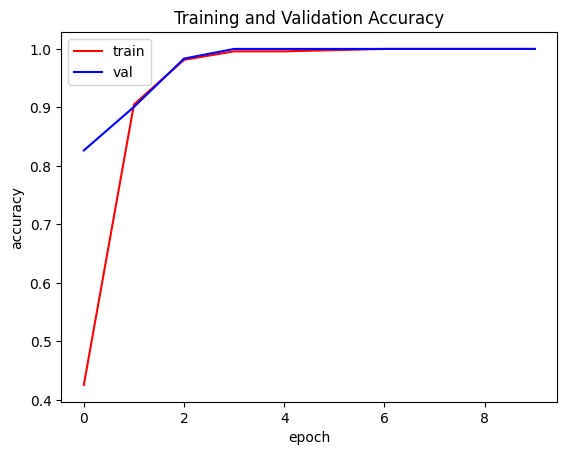

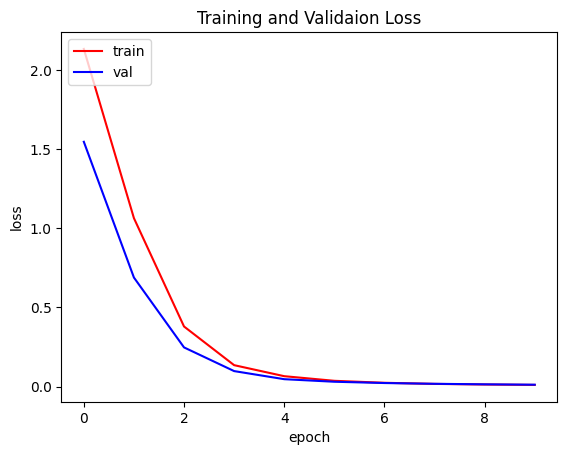

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0118 
Test accuracy: 1.0


In [40]:
# Define the save path with the .keras extension
save_path = 'saved_model/my_model.keras'

# Save the model in the Keras format
model.save(save_path)


In [31]:
pip install tensorflowjs


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 98.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [32]:
saved_model_dir = 'saved_model'
output_dir = '/content/tfjs_model'

os.makedirs(output_dir, exist_ok=True)

!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    {saved_model_dir} \
    {output_dir}

2024-11-20 07:46:58.508282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732088818.534957   23288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732088818.542604   23288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2024-11-20 07:47:07.872859: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1732088828.335739   23288 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [43]:
import numpy as np

# Load the saved model (replace with the correct path to your saved model)
model = tf.keras.models.load_model('/content/saved_model/my_model.keras')

# Crop and soil type mappings
crop_types = ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley', 'Wheat', 'Millets',
              'Oil seeds', 'Pulses', 'Ground Nuts', 'rice', 'pomegranate', 'coffee', 'watermelon',
              'kidneybeans', 'orange']

soil_types = ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']

# Function to get user input for N, P, K, temperature, crop type, humidity, and soil type
def get_user_input():
    print("Please input the following values:")
    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))

    # Get user input for crop type and soil type as text
    crop_type = input(f"Crop type ({', '.join(crop_types)}): ")
    soil_type = input(f"Soil type ({', '.join(soil_types)}): ")

    # Convert text input to corresponding integer index
    if crop_type not in crop_types:
        raise ValueError(f"Invalid crop type. Please choose from {', '.join(crop_types)}.")
    if soil_type not in soil_types:
        raise ValueError(f"Invalid soil type. Please choose from {', '.join(soil_types)}.")

    crop_type_index = crop_types.index(crop_type)
    soil_type_index = soil_types.index(soil_type)

    # Create the input array in the correct order [N, P, K, temperature, humidity, crop_type, soil_type]
    input_data = np.array([[N, P, K, temperature, humidity, crop_type_index, soil_type_index]])

    return input_data

# Get the input data from the user
input_data = get_user_input()

# Perform inference
predictions = model.predict(input_data)

# Display the predictions
print(f"Prediction: {predictions}")


Please input the following values:
Nitrogen content (N): 22
Phosphorus content (P): 20
Potassium content (K): 0
Temperature (°C): 32
Humidity (%): 62
Crop type (Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Wheat, Millets, Oil seeds, Pulses, Ground Nuts, rice, pomegranate, coffee, watermelon, kidneybeans, orange): Tobacco
Soil type (Sandy, Loamy, Black, Red, Clayey): Red


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 51, but received input with shape (1, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 7), dtype=float32)
  • training=False
  • mask=None

In [78]:
def get_user_input():
    # Input dari user
    print("Masukkan data berikut untuk memprediksi nama pupuk yang cocok:")
    N = float(input("N (Rasio Nitrogen): "))
    P = float(input("P (Rasio Phosphorous): "))
    K = float(input("K (Rasio Potassium): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))

    # Input untuk Crop Type dan Soil Type (kategori)
    crop_type = input("Crop Type (misal: Maize, Barley, Cotton, etc.): ")
    soil_type = input("Soil Type (misal: Sandy, Loamy, Clayey, etc.): ")

    # Masukkan input ke dalam DataFrame sementara
    user_input = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'Crop Type': [crop_type],
        'Soil Type': [soil_type]
    })

    # Lakukan One-Hot Encoding untuk kolom kategori
    user_input = pd.get_dummies(user_input, drop_first=True)

    # Pastikan urutan kolom sama dengan data training
    missing_cols = set(X.columns) - set(user_input.columns)
    for col in missing_cols:
        user_input[col] = 0
    user_input = user_input[X.columns]  # Menyusun ulang kolom sesuai data training

    # Skala input dengan scaler yang sama dengan yang digunakan sebelumnya
    if not hasattr(scaler, 'n_features_in_'):
        scaler.fit(X)

    user_input_scaled = scaler.transform(user_input)

    return user_input_scaled

# Fungsi untuk melakukan prediksi
def predict_fertilizer(model, user_input_scaled, label_encoder):
    # Prediksi menggunakan model
    prediction = model.predict(user_input_scaled)

    # Ambil prediksi dengan probabilitas tertinggi
    predicted_class = np.argmax(prediction, axis=1)

    # Dekode hasil prediksi ke nama pupuk asli
    fertilizer_name = label_encoder.inverse_transform(predicted_class)

    return fertilizer_name[0]

# Asumsikan `df` adalah DataFrame yang telah dimuat dan diolah sebelumnya.
# Melatih LabelEncoder pada kolom target 'Fertilizer Name'
label_encoder = LabelEncoder()
df['Fertilizer Name (Encoded)'] = label_encoder.fit_transform(df['Fertilizer Name (Encoded)'])

# Pisahkan fitur dan target
X = df.drop(columns=['Fertilizer Name (Encoded)'])  # Kolom target dihapus dari X
y = df['Fertilizer Name (Encoded)']  # Target: Nama pupuk

# One-Hot Encoding untuk fitur kategorikal (Crop Type dan Soil Type)
X = pd.get_dummies(X, drop_first=True)

# Skala fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Melatih model (asumsikan model sudah terlatih)
# model = ...

# Ambil input dari user dan lakukan prediksi
user_input_scaled = get_user_input()
predicted_fertilizer = predict_fertilizer(model, user_input_scaled, label_encoder)

# Tampilkan hasil prediksi
print(f"Rekomendasi pupuk: {predicted_fertilizer}")

Masukkan data berikut untuk memprediksi nama pupuk yang cocok:
N (Rasio Nitrogen): 1
P (Rasio Phosphorous): 1
K (Rasio Potassium): 1
Temperature (°C): 20
Humidity (%): 20
Crop Type (misal: Maize, Barley, Cotton, etc.): Maize
Soil Type (misal: Sandy, Loamy, Clayey, etc.): Sandy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Rekomendasi pupuk: 13
